<a href="https://colab.research.google.com/github/vkjadon/AI-ipynb/blob/master/09linearRegressionSKL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Case Study - 1 (Marks-10)  

**Implement the Linear Regression on the Diabetes Dataset of the SciKit-Learn. The parameters obtained must be as close as the parameters obtained using Linear Rgression Method of Linear Model available in SciKit Library. Calculate the accuracy of your model with respect to SciKit model**  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Comment it if you are running all the cells again in the same Colab Session else uncomment
#%cd drive/MyDrive/Colab Notebooks/AI-ipynb

## Importing Dataset

[Toy SciKit-Learn Dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html)



In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import numpy as np

In [5]:

# Load the diabetes dataset
diabetes_X, y = datasets.load_diabetes(return_X_y=True)

In [6]:
print(diabetes_X.shape)
print(type(diabetes_X))
print(y.shape)

(442, 10)
<class 'numpy.ndarray'>
(442,)


In [7]:

# Using the jth feature
j=[1,2,3,4]
X = diabetes_X[:, j] # All Rows of jth column
X=X.reshape(diabetes_X.shape[0],len(j)) # To restrict to only desired columns list `j`
print(X.shape)
# print(type(X))
#print(X)



(442, 4)


In [8]:
# Using all the features
X = diabetes_X
print(X.shape)
#print(type(X))
#print(X)

(442, 10)


In [9]:

# Create linear regression object
lr = linear_model.LinearRegression()

# Train the model using the training sets
lr.fit(X, y)

# The coefficients
w_skl=lr.coef_.reshape(X.shape[1],1)
b_skl=lr.intercept_
print("Coefficients: \n", w_skl)
print("Intercept: \n", b_skl)

Coefficients: 
 [[ -10.01219782]
 [-239.81908937]
 [ 519.83978679]
 [ 324.39042769]
 [-792.18416163]
 [ 476.74583782]
 [ 101.04457032]
 [ 177.06417623]
 [ 751.27932109]
 [  67.62538639]]
Intercept: 
 152.1334841628965


In [10]:
X_mf=X.T
nx,m=X_mf.shape
print("nx, m", nx,m)
print("y ", y.shape)
y=y.reshape(1,X_mf.shape[1])
print("y after reshape ", y.shape)
learning_rate=0.001
max_iteration=20000
# print(X_mf,y)
w=np.zeros(nx).reshape(nx,1)
J=np.zeros(max_iteration)
b=0.0
#print(X_mf.shape, y.shape, w.shape,w)
for i in range(max_iteration):
  yhat=np.dot(w.T,X_mf)+b
  # print("yhat ", yhat)
  J[i]=np.dot((yhat-y),(yhat-y).T)*(0.5*m)
  # print("yhat ", yhat)
  dw=(1/m)*np.dot(X_mf,(yhat-y).T)
  db=(1/m)*np.sum((yhat-y), axis=1) # axis=1 : Output rowwise sum 
  w=w-learning_rate*dw
  b=b-learning_rate*db
w_model,b_model=w,b
print("w_skl and w_model \n", w_skl.T, "\n",w_model.T)
# print("w_model and b_model ", w_model, b_model)
print("w_diff", 100*(w_model-w_skl)/w_skl)

nx, m 10 442
y  (442,)
y after reshape  (1, 442)
w_skl and w_model 
 [[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
   476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]] 
 [[ 12.31317479   2.03555064  40.41043803  30.16989587  13.51478134
   10.73956664 -26.74239306  28.61741478  38.59705997  25.64406086]]
w_diff [[-222.98173698]
 [-100.84878591]
 [ -92.22636684]
 [ -90.69951105]
 [-101.70601509]
 [ -97.74731822]
 [-126.46593773]
 [ -83.83782909]
 [ -94.86248871]
 [ -62.07923942]]


(20000,) (20000,)


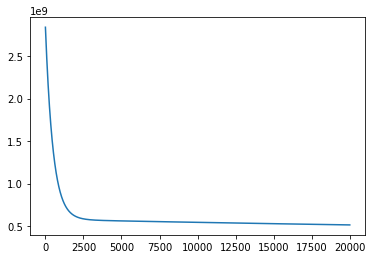

In [11]:
xPlot=np.linspace(1,max_iteration, num=max_iteration)
print(xPlot.shape, J.shape)
plt.plot(xPlot,J)

There is a lot of difference in the w_skl and w_model. This could be due to the inefficient hyper-parameters or due to the feature scaling.

In [ ]:
import pandas as pd
df = pd.DataFrame(X)
print(df)
print(type(df))

In [13]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


The mean of the data is almost `zero` but standard deviation is not approximately `1`. So, we must normalize the data.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       442 non-null    float64
 1   1       442 non-null    float64
 2   2       442 non-null    float64
 3   3       442 non-null    float64
 4   4       442 non-null    float64
 5   5       442 non-null    float64
 6   6       442 non-null    float64
 7   7       442 non-null    float64
 8   8       442 non-null    float64
 9   9       442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


There is no data with null value.